In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qclab.simulation as simulation
from qclab.models.spin_boson import SpinBosonModel
from qclab.algorithms.mf import MeanFieldDynamics
from qclab.algorithms.fssh import FewestSwitchesSurfaceHoppingDynamics
from qclab.algorithms.cfssh import CoherentFewestSwitchesSurfaceHoppingDynamics
from qclab.drivers.ray_driver import dynamics_parallel_ray

In [2]:
input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
sim = SpinBosonModel(input_params = input_params)

sim.num_trajs = 20
sim.tmax=int(1/0.0260677)+1
sim.dt_output=0.01
sim.dt=1/(10*sim.w[-1])

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 10*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_mf = dynamics_parallel_ray(MeanFieldDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-09 12:50:23,556	INFO worker.py:1771 -- Started a local Ray instance.
100%|██████████| 2/2 [00:13<00:00,  6.96s/it]


In [3]:
input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
sim = SpinBosonModel(input_params = input_params)

sim.num_branches = sim.num_states
sim.num_trajs = 20
sim.tmax=int(1/0.0260677)+1
sim.dt_output=0.01
sim.dt=1/(10*sim.w[-1])
sim.dmat_const = 0
sim.pab_cohere = True
sim.sh_deterministic = True
sim.gauge_fix = 0

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 10*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_fssh = dynamics_parallel_ray(FewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-09 12:50:41,539	INFO worker.py:1771 -- Started a local Ray instance.
100%|██████████| 2/2 [00:41<00:00, 20.73s/it]


In [4]:
input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
sim = SpinBosonModel(input_params = input_params)

sim.num_branches = sim.num_states
sim.num_trajs = 20
sim.tmax=int(1/0.0260677)+1
sim.dt_output=0.01
sim.dt=1/(10*sim.w[-1])
sim.dmat_const = 0
sim.pab_cohere = False
sim.sh_deterministic = True
sim.gauge_fix = 0

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 10*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_cfssh = dynamics_parallel_ray(CoherentFewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-09 12:51:26,843	INFO worker.py:1771 -- Started a local Ray instance.
100%|██████████| 2/2 [01:02<00:00, 31.35s/it]


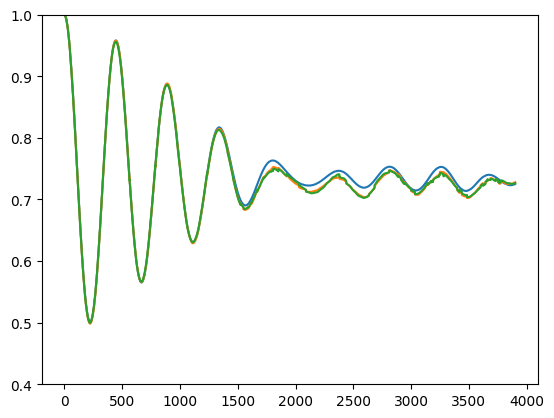

In [5]:
pops_fssh = np.real(np.einsum('nii->ni',data_fssh.data_dic['dm_db']))
ntraj = np.sum(pops_fssh[0])
pops_fssh = pops_fssh/ntraj

pops_mf = np.real(np.einsum('nii->ni',data_mf.data_dic['dm_db']))
ntraj = np.sum(pops_mf[0])
pops_mf = pops_mf/ntraj

pops_cfssh = np.real(np.einsum('nii->ni',data_cfssh.data_dic['dm_db']))
ntraj = np.sum(pops_cfssh[0])
pops_cfssh = pops_cfssh/ntraj

plt.plot(pops_mf[:,0])
plt.plot(pops_fssh[:,0])
plt.plot(pops_cfssh[:,0])
plt.ylim([0.4,1])
plt.show()